<a href="https://colab.research.google.com/github/jpatata/kpmg_practice/blob/main/Sprocket_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sprocket Central Pty Ltd Data Quality Assessment

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive #to import the file via GoogleDrive
import seaborn as sns #to run statistics such as boxplots

## Data Import

Connecting to GoogleDrive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the file

In [ ]:
df = pd.read_excel('/content/KPMG2.xlsx')
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,38482.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,39526.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,37873.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,34165.0
19996,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,38750.0
19997,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
19998,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0


Getting the customerdemographic tab

In [ ]:
df2 = pd.read_excel('KPMG2.xlsx', 'CustomerDemographic')
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


Getting the customeraddress tab

In [ ]:
df3 = pd.read_excel('KPMG2.xlsx', 'CustomerAddress')
df3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


## Joining Data

Joining Transactions and Customer Demographic sheetsl, only for when a customer made a transaction.

In [ ]:
df_join = pd.merge(df, df2,on='customer_id', how='inner')
df_join

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0
19993,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0
19994,8562,33,3500,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0


Add the customer address sheet to the newly created table from the prior sheet. This time also if there is no data available.

In [ ]:
df_joinall = pd.merge(df_join, df3,on='customer_id', how='left')
df_joinall

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0
19993,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0
19994,8562,33,3500,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0


## Data Overview

Get an overview of the data

In [ ]:
df_joinall.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,19997.000000,19997.000000,19997.000000,19637.000000,19997.000000,19800.000000,19800.000000,19997.000000,19551.000000,19968.000000,19968.000000
mean,9999.856078,45.371456,1737.751613,0.500535,1107.919641,556.068047,38199.919747,48.772466,10.683239,2987.623347,7.516376
std,5773.636854,30.750876,1011.221384,0.500012,582.818787,405.976881,2875.056794,28.598250,5.676403,851.306647,2.824783
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,0.000000,1.000000,2000.000000,1.000000
25%,5000.000000,18.000000,857.000000,0.000000,575.270000,215.140000,35667.000000,24.000000,6.000000,2200.000000,6.000000
50%,10000.000000,44.000000,1736.000000,1.000000,1163.890000,507.580000,38216.000000,48.000000,11.000000,2767.000000,8.000000
75%,14999.000000,72.000000,2613.000000,1.000000,1635.300000,795.100000,40672.000000,73.000000,15.000000,3754.000000,10.000000
max,20000.000000,100.000000,3500.000000,1.000000,2091.470000,1759.850000,42710.000000,99.000000,22.000000,4883.000000,12.000000


In [ ]:
df_joinall.shape

(19997, 30)

## Data Types, Missing and Unique Values Overview

Creating a table to get an overview of data types, as well as missing and unique values for each column

In [ ]:
data_types = pd.DataFrame(
    df_joinall.dtypes,
    columns=['Data Type']
)

In [ ]:
missing_data = pd.DataFrame(
    df_joinall.isnull().sum(),
    columns=['Missing Values']
)

In [ ]:
unique_values = pd.DataFrame(
    columns=['Unique Values']
)
for row in list(df_joinall.columns.values):
    unique_values.loc[row] = [df_joinall[row].nunique()]

In [ ]:
dq_report = data_types.join(missing_data).join(unique_values)
dq_report

,Data Type,Missing Values,Unique Values
transaction_id,int64,0,19997
product_id,int64,0,101
customer_id,int64,0,3493
transaction_date,datetime64[ns],0,364
online_order,float64,360,2
order_status,object,0,2
brand,object,197,6
product_line,object,197,4
product_class,object,197,3
product_size,object,197,3


See if there is a standard cost that is higher than the list price (which should not be the case)

In [ ]:
df_joinall[df_joinall.list_price < df_joinall.standard_cost]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation


## Data Outliers

Look for outliers

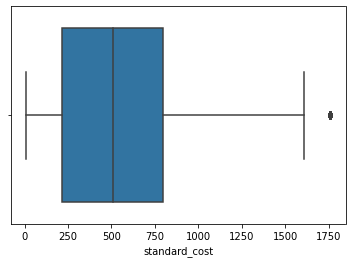

In [ ]:
sns.boxplot(x=df_joinall['standard_cost'])

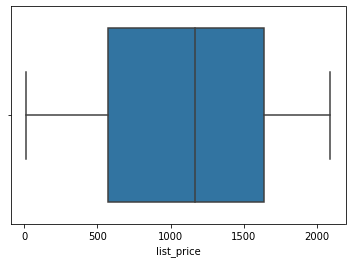

In [ ]:
sns.boxplot(x=df_joinall['list_price'])

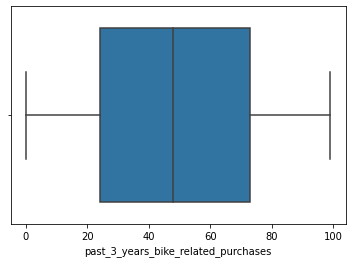

In [ ]:
sns.boxplot(x=df_joinall['past_3_years_bike_related_purchases'])

##Other

In [ ]:
df_joinall['transaction_id'].duplicated().sum()

0

In [ ]:
df_joinall['transaction_id'].duplicated().sum()

In [ ]:
df_joinall['gender'].value_counts()

Female    9993
Male      9525
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

## Suggestions

* You need to decide the type of data we want to work with. There are customers who never made a transaction, should those be included or only those who did buy something? Then there are customers with missing addresses, should those be included, or only customers with addresses? Based on that, we can make a decision on how to merge the tables.
* Is the default column important? It has a lot of unusuable characters so it would be preferable to drop the column
* Some columns, such as online_order have 1 and 0 for yes or no and some, such as deceased indicator, Y or N. It would make sense to use one way to signify yes or no, and 1 or 0 is good to use for later analyses that might be conducted.
* Product_first_sold_date is float64, but should be datetime.
* I would suggest turning postcode into string instead of it being a float
* We need to replace missing values by defining what to replace them with, especially for columns such as job_title and job_industry_category
* There are customer addresses with customer id's that are not present in customerdemographic and there are also addresses missing for certain customers in customerdemographics (eg for customer_id = 3)
* The gender column needs to be updated to include uniform descriptions, currently there are 6 different designations
* While the box plot for list_price shows no outliers, there is an outlier for standard_cost at 1750. This could be a bad data point for further analysis, however, before elimination, we need to try to understand why it appeared and whether it is likely similar values will continue to appear


##Example of Separating Data

Should decide whether you would like to join the customerdemographic with transactions and customeraddress, or whether you want to include those that made no transactions. I would suggest looking at those that have made transactions and keep the ones that haven't seperately (and join them with customeraddress). This would give you two samples, those that made a transaction and those that didn't, with the same sample number, which could be used to run statistics to compare the two samples.

First, let's combine the customerdemographic dataframe with the transaction dataframe, including all rows, even if there was no transaction

In [ ]:
df_join2 = pd.merge(df2, df, how="outer", on='customer_id')
df_join2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,94.0,86.0,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,38482.0
1,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,3765.0,38.0,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,39526.0
2,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,5157.0,47.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0
3,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9785.0,72.0,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,37873.0
4,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,13424.0,2.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,3999,Patrizius,NaN,Male,11.0,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20503,4000,Kippy,Oldland,Male,76.0,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20504,5034,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8708.0,0.0,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
20505,5034,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16701.0,0.0,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0


Now we separate all those rows where there is no data for transaction_id, etc.

In [ ]:
df_notransaction = df_join2[df_join2['transaction_id'].isnull()]
df_notransaction

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4971,852,Andie,Bonney,Female,37.0,2000-11-04,Compensation Analyst,Financial Services,Affluent Customer,N,!@#$%^&*(),Yes,2.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5057,869,Addia,Abels,Female,7.0,1984-03-11,Account Representative I,Financial Services,High Net Worth,N,"__ï¾(,_,*)",Yes,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7914,1373,Shaylynn,Epsley,Female,3.0,1958-09-23,Director of Sales,Financial Services,Mass Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,12.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11966,2074,Roslyn,Rawdall,Female,90.0,1997-06-11,NaN,Financial Services,Mass Customer,N,100,No,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15294,2660,Hunt,Scollard,Male,44.0,1963-11-15,NaN,Retail,High Net Worth,N,NaN,Yes,19.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,3996,Rosalia,Halgarth,Female,8.0,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20500,3997,Blanch,Nisuis,Female,87.0,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20501,3998,Sarene,Woolley,U,60.0,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20502,3999,Patrizius,NaN,Male,11.0,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then we take only those columns that were part of customerdemographic

In [ ]:
df_nt = df_notransaction.loc[:,'customer_id':'tenure']
df_nt

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
4971,852,Andie,Bonney,Female,37.0,2000-11-04,Compensation Analyst,Financial Services,Affluent Customer,N,!@#$%^&*(),Yes,2.0
5057,869,Addia,Abels,Female,7.0,1984-03-11,Account Representative I,Financial Services,High Net Worth,N,"__ï¾(,_,*)",Yes,10.0
7914,1373,Shaylynn,Epsley,Female,3.0,1958-09-23,Director of Sales,Financial Services,Mass Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,12.0
11966,2074,Roslyn,Rawdall,Female,90.0,1997-06-11,NaN,Financial Services,Mass Customer,N,100,No,4.0
15294,2660,Hunt,Scollard,Male,44.0,1963-11-15,NaN,Retail,High Net Worth,N,NaN,Yes,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,3996,Rosalia,Halgarth,Female,8.0,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
20500,3997,Blanch,Nisuis,Female,87.0,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
20501,3998,Sarene,Woolley,U,60.0,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
20502,3999,Patrizius,NaN,Male,11.0,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


and finally we do an inner join with the address datafram

In [ ]:
final_nt = pd.merge(df_nt, df3, how="left", on='customer_id')
final_nt

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,852,Andie,Bonney,Female,37.0,2000-11-04,Compensation Analyst,Financial Services,Affluent Customer,N,!@#$%^&*(),Yes,2.0,641 Waywood Lane,2336,NSW,Australia,7
1,869,Addia,Abels,Female,7.0,1984-03-11,Account Representative I,Financial Services,High Net Worth,N,"__ï¾(,_,*)",Yes,10.0,6712 Nova Crossing,2065,NSW,Australia,10
2,1373,Shaylynn,Epsley,Female,3.0,1958-09-23,Director of Sales,Financial Services,Mass Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,12.0,939 Hermina Drive,3198,VIC,Australia,8
3,2074,Roslyn,Rawdall,Female,90.0,1997-06-11,NaN,Financial Services,Mass Customer,N,100,No,4.0,0442 Debra Point,2281,NSW,Australia,7
4,2660,Hunt,Scollard,Male,44.0,1963-11-15,NaN,Retail,High Net Worth,N,NaN,Yes,19.0,68128 Leroy Street,4213,QLD,Australia,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,3996,Rosalia,Halgarth,Female,8.0,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977,VIC,Australia,6
503,3997,Blanch,Nisuis,Female,87.0,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
504,3998,Sarene,Woolley,U,60.0,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
505,3999,Patrizius,NaN,Male,11.0,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3
